    Name: Jinhan Cheng
    UNI: jc4834

In [36]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer, scale, StandardScaler
from sklearn.metrics import roc_auc_score

In [37]:
train = pd.read_csv('hw5_data_train.csv')
test = pd.read_csv('hw5_data_test.csv')

# Task 1 Title and Body

In [38]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

## Use the title only

In [19]:
X_title_train, y_train = train['Title'].astype(str), train['Recommended']
X_title_test, y_test = test['Title'].astype(str), test['Recommended'] 

In [20]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [21]:
feature_names = vect.get_feature_names()

### Before Tunning Parameters

In [22]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.877724795640327


#### Visualizing Important Features

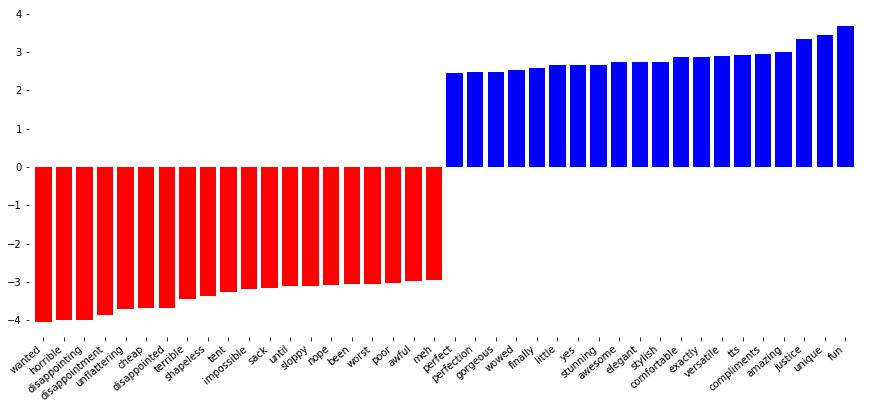

In [34]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Tuning Parameters with Grid-Search

In [35]:
param_grid = {'C' : np.logspace(-3,3,100)}
g1_1 = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, return_train_score=True, iid=True)
g1_1.fit(X_train, y_train)
print("Best parameters: {}".format(g1_1.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g1_1.best_score_))

Best parameters: {'C': 3.7649358067924674}
Best cross-validation Accuracy score: 0.88


#### Visualizing Important Features

In [37]:
lgr = LogisticRegression(C=3.765).fit(X_train, y_train)

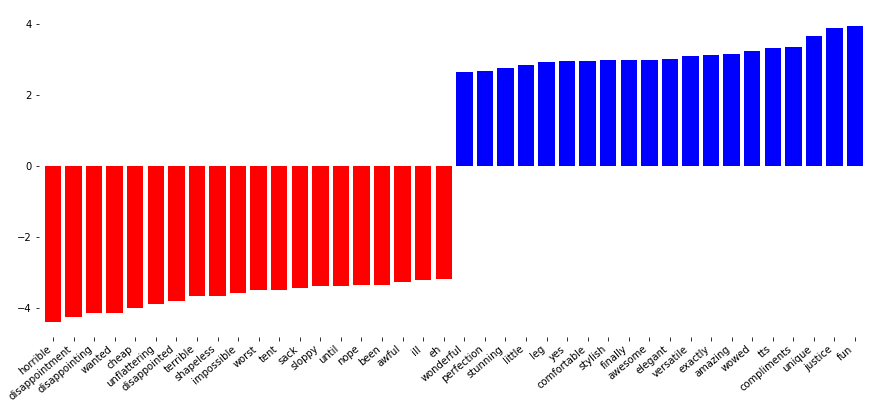

In [38]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Final Test Set Scores

In [39]:
print("Final testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr.decision_function(X_test))))

Final testing set Accuracy score: 0.8778950953678474
Final testing set AUC score: 0.8897642618194207


## Use the review body only

In [96]:
X_title_train = train['Review'].astype(str)
X_title_test = test['Review'].astype(str)

In [97]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [98]:
feature_names = vect.get_feature_names()

### Before Tunning Parameters

In [99]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8889645776566758


#### Visualizing Important Features

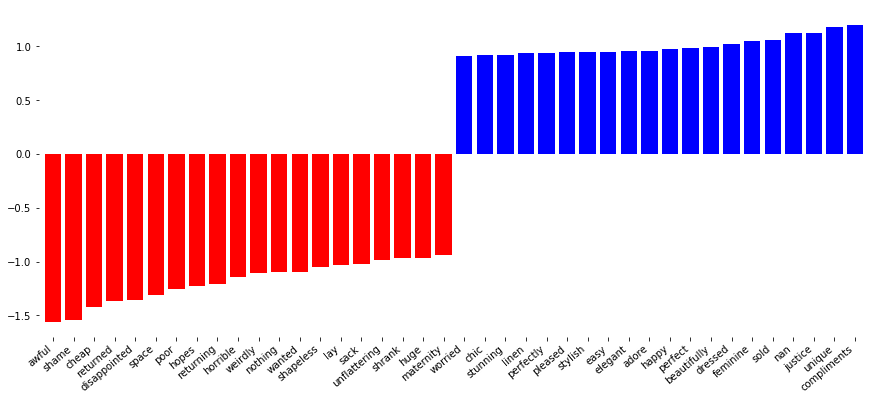

In [44]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Tuning Parameters with Grid-Search

In [45]:
param_grid = {'C' : np.logspace(-3,3,100)}
g1_2 = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, return_train_score=True, iid=True)
g1_2.fit(X_train, y_train)
print("Best parameters: {}".format(g1_2.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g1_2.best_score_))

Best parameters: {'C': 0.2009233002565048}
Best cross-validation Accuracy score: 0.89


#### Visualizing Important Features

In [46]:
lgr = LogisticRegression(C=0.2).fit(X_train, y_train)

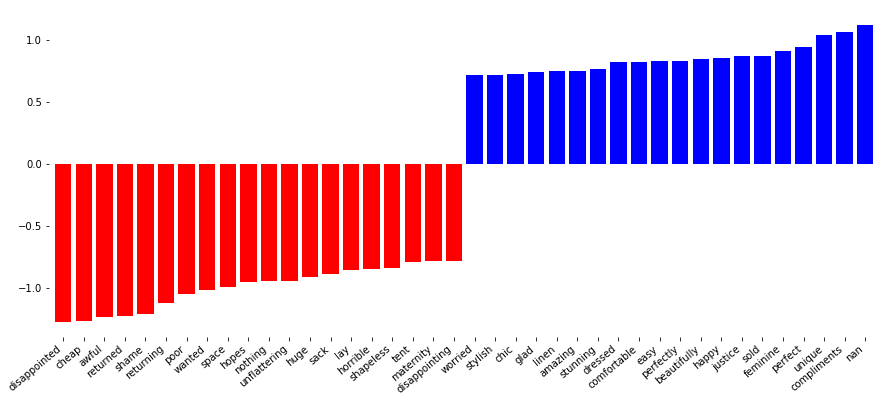

In [47]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Final Test Set Scores

In [48]:
print("Final testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr.decision_function(X_test))))

Final testing set Accuracy score: 0.8915190735694822
Final testing set AUC score: 0.919188797626675


## Concatenate the title and review to a single text and analyze that

In [39]:
X_title_train = (train['Title']+' '+train['Review']).astype(str)
X_title_test = (test['Title']+' '+test['Review']).astype(str)

In [40]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [41]:
feature_names = vect.get_feature_names()

### Before Tunning Parameters

In [103]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8911784741144414


#### Visualizing Important Features

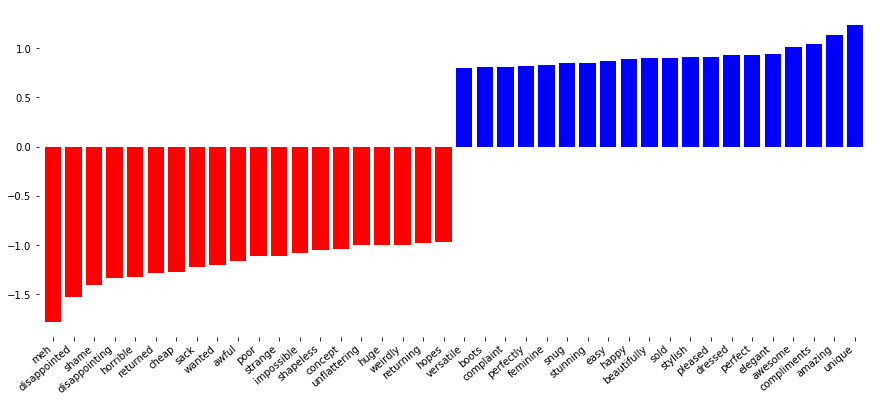

In [55]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Tuning Parameters with Grid-Search

In [56]:
param_grid = {'C' : np.logspace(-3,3,100)}
g1_3 = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, return_train_score=True, iid=True)
g1_3.fit(X_train, y_train)
print("Best parameters: {}".format(g1_3.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g1_3.best_score_))

Best parameters: {'C': 0.1}
Best cross-validation Accuracy score: 0.89


#### Visualizing Important Features

In [57]:
lgr = LogisticRegression(C=0.1).fit(X_train, y_train)

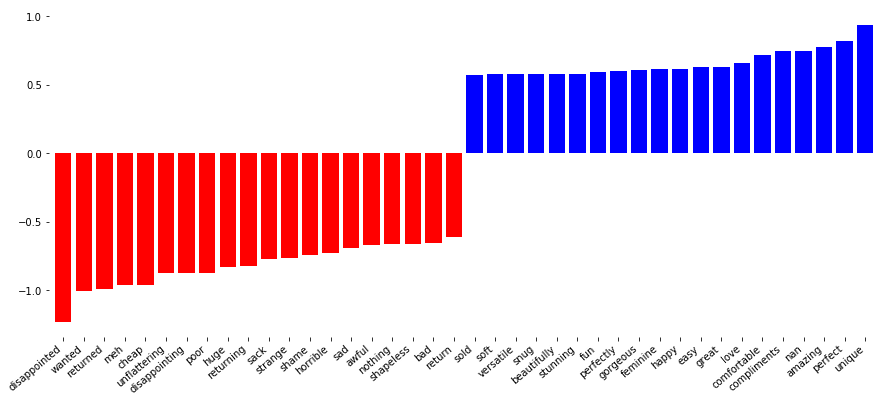

In [58]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Final Test Set Scores

In [59]:
print("Final testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr.decision_function(X_test))))

Final testing set Accuracy score: 0.892200272479564
Final testing set AUC score: 0.9140646545211526


## Vectorizing title and review individually and concatenating the vector representations

In [104]:
X_title_train_1 = train['Title'].astype(str)
X_title_train_2 = train['Review'].astype(str)
X_title_test_1 = test['Title'].astype(str)
X_title_test_2 = test['Review'].astype(str)

In [105]:
vect1 = CountVectorizer()
vect2 = CountVectorizer()
X_train_1 = vect1.fit_transform(X_title_train_1)
X_train_2 = vect2.fit_transform(X_title_train_2)
X_test_1 = vect1.transform(X_title_test_1)
X_test_2 = vect2.transform(X_title_test_2)

In [106]:
X_train = sp.hstack((X_train_1,X_train_2))
X_test = sp.hstack((X_test_1,X_test_2))
feature_names = vect1.get_feature_names() + vect2.get_feature_names()

### Before Tunning Parameters

In [107]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.901566757493188


#### Visualizing Important Features

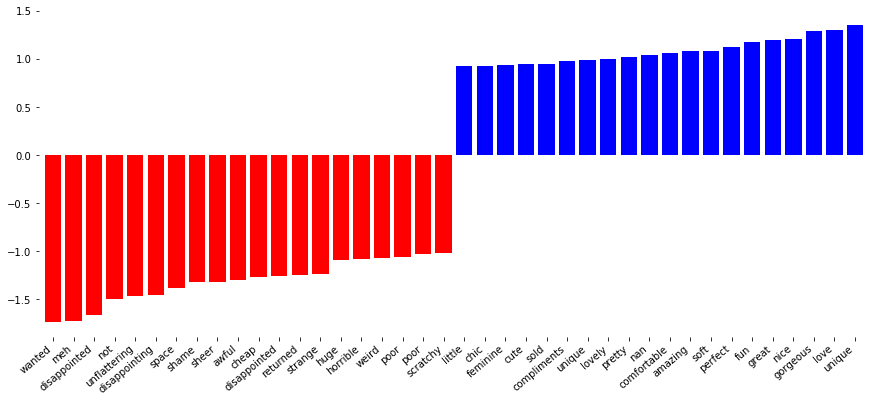

In [75]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Tuning Parameters with Grid-Search

In [77]:
param_grid = {'C' : np.logspace(-3,3,100)}
g1_4 = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, return_train_score=True, iid=True)
g1_4.fit(X_train, y_train)
print("Best parameters: {}".format(g1_4.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g1_4.best_score_))

Best parameters: {'C': 0.30538555088334157}
Best cross-validation Accuracy score: 0.91


#### Visualizing Important Features

In [83]:
lgr = LogisticRegression(C=0.3054).fit(X_train, y_train)

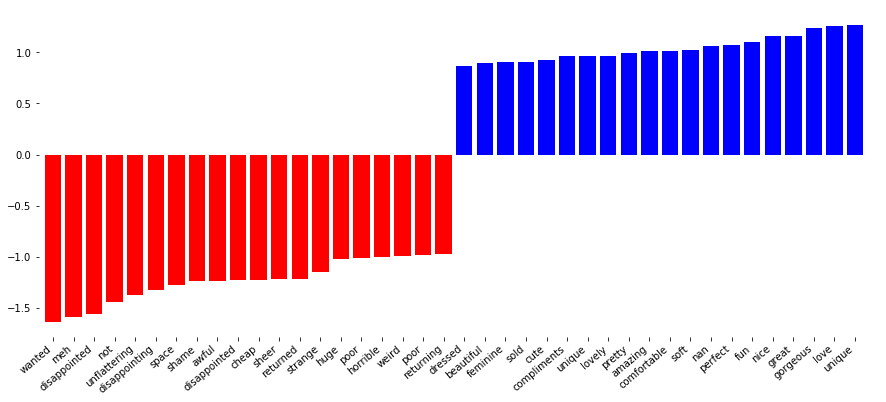

In [84]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Final Test Set Scores

In [85]:
print("Final testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr.decision_function(X_test))))

Final testing set Accuracy score: 0.9017370572207084
Final testing set AUC score: 0.9374456855920219


The 4th way works best.

# Task 2 Feature Tuning

## Using TfidfVectorizer instead of CountVectorizer

In [42]:
X_title_train = (train['Title']+' '+train['Review']).astype(str)
X_title_test = (test['Title']+' '+test['Review']).astype(str)

In [116]:
tfid = TfidfVectorizer()
X_train = tfid.fit_transform(X_title_train)
X_test = tfid.transform(X_title_test)

In [110]:
feature_names = tfid.get_feature_names()

In [111]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8950953678474114


Compared with the score 0.8912 with part 3 in Task1, it changes the score.

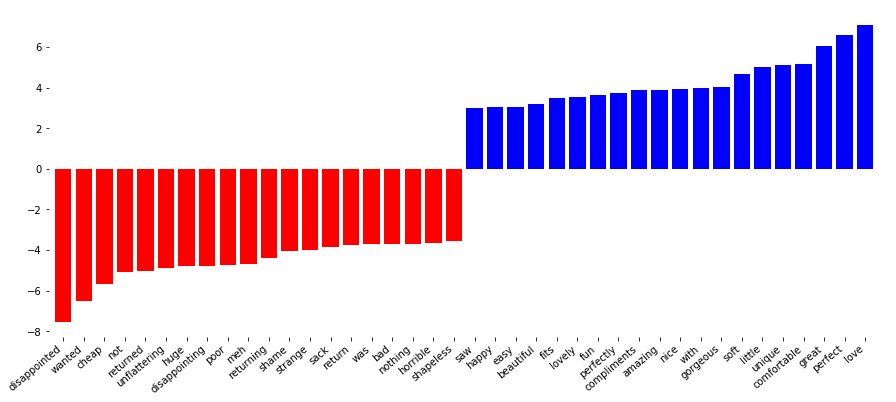

In [91]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

Compared with plot in part 3 of Task1, it changes the important coefficients.

## Normalizer with CountVectorizer

In [214]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [215]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [216]:
feature_names = vect.get_feature_names()

In [217]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8954359673024523


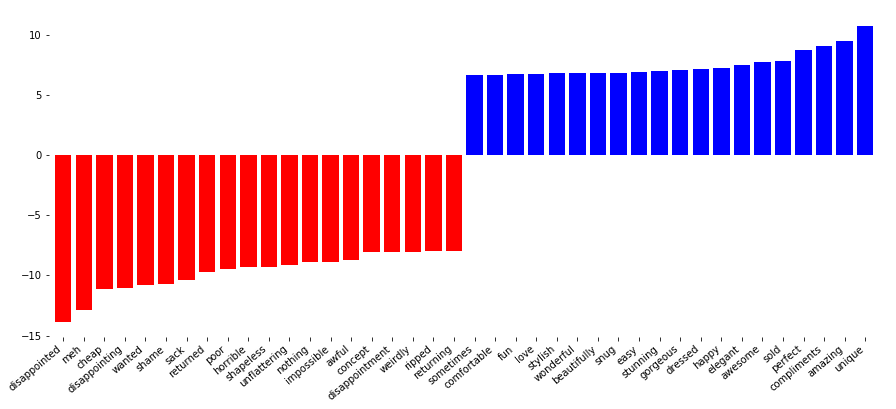

In [218]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

Using a Normalizer with CountVectorizer does change the outcome

## Using stop-word

In [219]:
vect = CountVectorizer(stop_words='english')
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [220]:
feature_names = vect.get_feature_names()

In [221]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8904972752043597


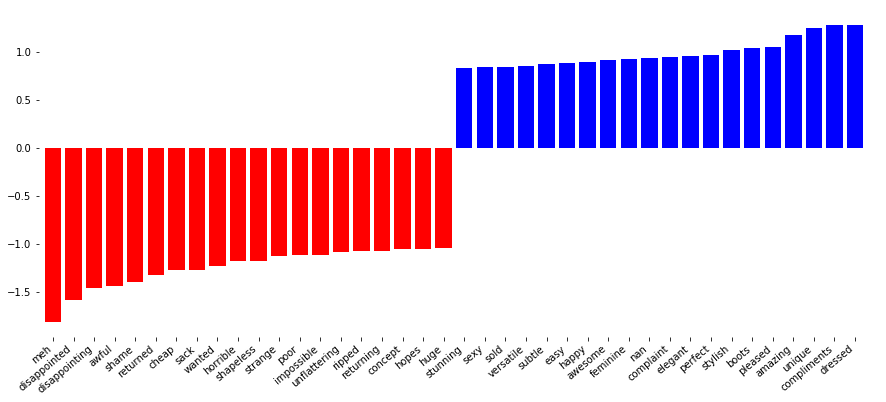

In [222]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

The standard English stop-words does not help because the testing set score decreases.

## Using min_df or max_df

### Using min_df

#### min_df = 2

In [127]:
vect = CountVectorizer(min_df=2)
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [128]:
len(vect.get_feature_names())

7183

In [129]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8915190735694822


#### min_df = 3

In [130]:
vect = CountVectorizer(min_df=3)
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [131]:
len(vect.get_feature_names())

5602

In [132]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8911784741144414


#### min_df = 4

In [133]:
vect = CountVectorizer(min_df=4)
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [134]:
len(vect.get_feature_names())

4763

In [135]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8910081743869209


With the increase of min_df, the score decreases and numbers of features decreases.

### Using max_df

#### max_df = 4

In [162]:
vect = CountVectorizer(max_df=4)
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [163]:
len(vect.get_feature_names())

8311

In [164]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8223773841961853


#### max_df = 3

In [165]:
vect = CountVectorizer(max_df=3)
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [166]:
len(vect.get_feature_names())

7753

In [167]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8223773841961853


#### max_df = 2

In [168]:
vect = CountVectorizer(max_df=2)
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [169]:
len(vect.get_feature_names())

6914

In [170]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8223773841961853


With the decrease of max_df, the score doesn't change and the number of features decreases.

## Using the method in part 2 generate the best result, then use this method for the final test-set

In [223]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [224]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [225]:
feature_names = vect.get_feature_names()

### Tuning Parameters with Grid-Search

In [147]:
param_grid = {'C' : np.logspace(-3,3,100)}
g2 = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, return_train_score=True, iid=True)
g2.fit(X_train, y_train)
print("Best parameters: {}".format(g2.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g2.best_score_))

Best parameters: {'C': 20.09233002565046}
Best cross-validation Accuracy score: 0.89


In [226]:
lgr = LogisticRegression(C=20.09).fit(X_train, y_train)

### Visualizing Important Features

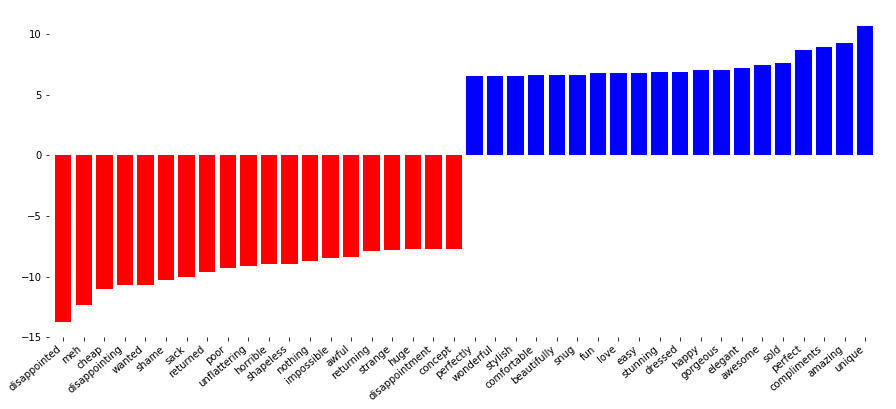

In [227]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Final Test Set Scores

In [151]:
print("Final testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr.decision_function(X_test))))

Final testing set Accuracy score: 0.8957765667574932
Final testing set AUC score: 0.9167134405091324


# Task 3 n-grams

## Changing from unigrams to n-grams of varying length

### ngram_range=(1, 1)

In [199]:
vect = CountVectorizer(ngram_range=(1, 1))
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [200]:
feature_names = vect.get_feature_names()

In [201]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [202]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8954359673024523


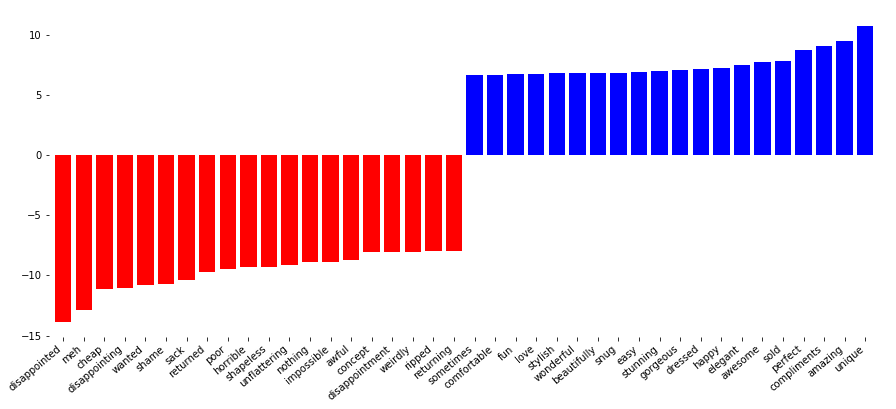

In [203]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### ngram_range=(1, 2)

In [43]:
vect = CountVectorizer(ngram_range=(1, 2))
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [44]:
feature_names = vect.get_feature_names()

In [45]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [46]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.903099455040872


In [197]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

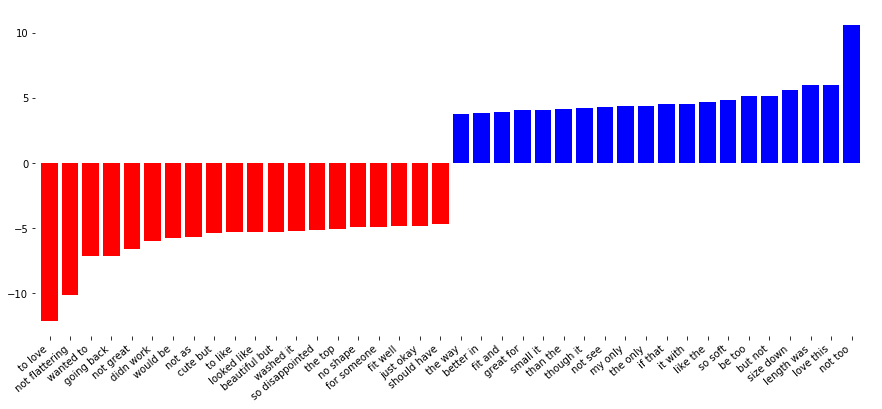

In [198]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel()[mask], np.array(feature_names)[mask], top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### ngram_range=(1, 3)

In [187]:
vect = CountVectorizer(ngram_range=(1, 3))
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [188]:
feature_names = vect.get_feature_names()

In [189]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [190]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.9019073569482289


In [191]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3

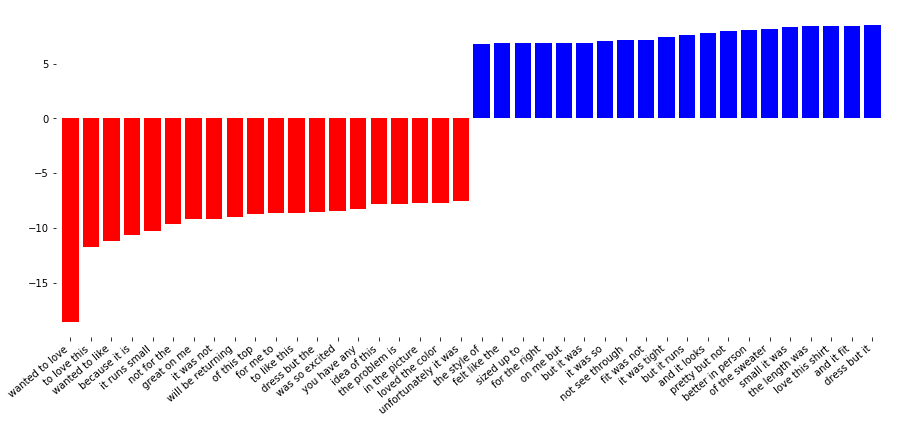

In [192]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel()[mask], np.array(feature_names)[mask], top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### ngram_range=(1, 4)

In [178]:
vect = CountVectorizer(ngram_range=(1, 4))
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [179]:
feature_names = vect.get_feature_names()

In [172]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [173]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.9007152588555858


In [184]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 4

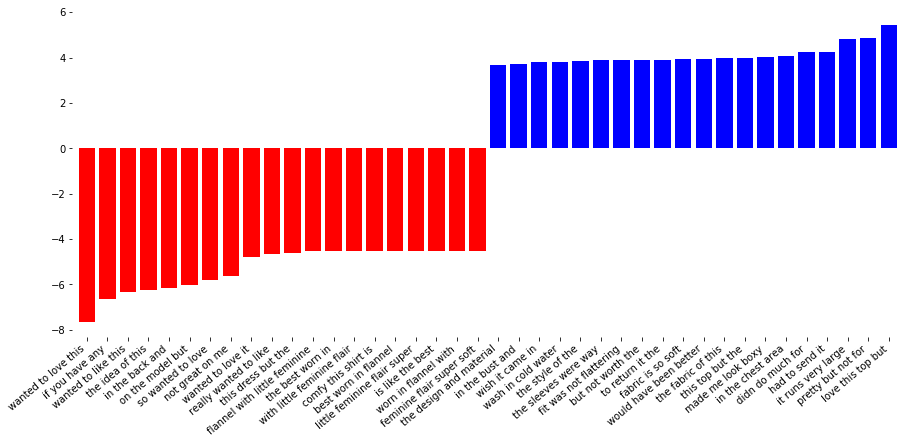

In [186]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel()[mask], np.array(feature_names)[mask], top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

Using n-grams=range(1,2) provides the best performance.

## Using character n-grams

### analyzer="char"

In [204]:
vect = CountVectorizer(ngram_range=(1, 2), analyzer="char")
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [205]:
feature_names = vect.get_feature_names()

In [206]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [207]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8756811989100818


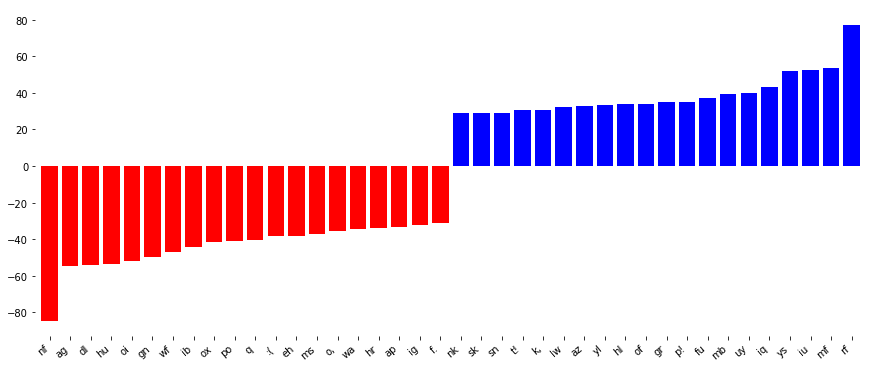

In [208]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### analyzer="char_wb"

In [209]:
vect = CountVectorizer(ngram_range=(1, 2), analyzer="char_wb")
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)

In [210]:
feature_names = vect.get_feature_names()

In [211]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [212]:
lgr = LogisticRegressionCV(cv=5).fit(X_train, y_train)
print("Testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))

Testing set Accuracy score: 0.8761920980926431


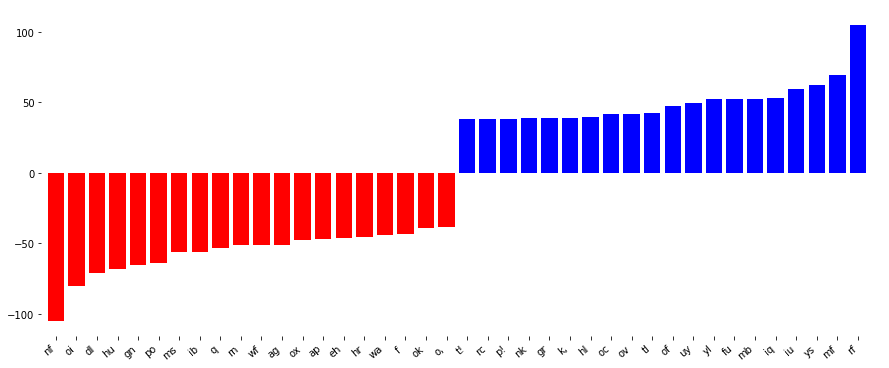

In [213]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

Using charater n-grams doesn't improve the performance.

## min_df and stop-words with n-grams

### Numbers of Features

In [239]:
param_grid = {"countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3), (1, 4),
                                               (2, 2), (2, 3), (2, 4), (2, 5)],
              "countvectorizer__min_df": [1, 2, 3, 4],
             }

#### Without stop_words

In [252]:
ngram = []
min_df = []
n_features = []
for i in param_grid["countvectorizer__ngram_range"]:
    for j in param_grid["countvectorizer__min_df"]:
        vect = CountVectorizer(ngram_range=i, min_df=j)
        X_train = vect.fit_transform(X_title_train)
        n_features.append(len(vect.get_feature_names()))
        ngram.append(i)
        min_df.append(j)

In [264]:
nfeatures = [ ('ngram', ngram),
          ('min_df', min_df),
          ('n_features',  n_features)]
nfeatures = pd.DataFrame.from_items(nfeatures)
nfeatures = nfeatures.pivot_table( index='ngram', columns='min_df', values='n_features' )
nfeatures

min_df,1,2,3,4
ngram,,,,
"(1, 1)",12516,7183,5602,4763
"(1, 2)",196229,70274,44985,33765
"(1, 3)",690633,156275,88193,61760
"(1, 4)",1392952,211017,109702,73988
"(2, 2)",183713,63091,39383,29002
"(2, 3)",678117,149092,82591,56997
"(2, 4)",1380436,203834,104100,69225
"(2, 5)",2161907,227316,111106,72644


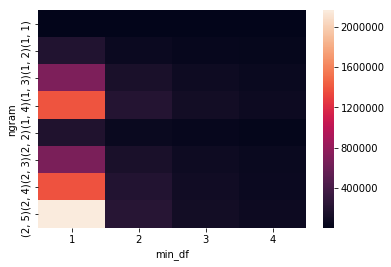

In [258]:
ax = sns.heatmap(nfeatures)

The number of features decreases with the increasing min_df and increases with the increasing length of n_grams.

#### stop_words='english'

In [259]:
ngram_s = []
min_df_s = []
n_features_s = []
for i in param_grid["countvectorizer__ngram_range"]:
    for j in param_grid["countvectorizer__min_df"]:
        vect = CountVectorizer(ngram_range=i, min_df=j, stop_words='english')
        X_train = vect.fit_transform(X_title_train)
        n_features_s.append(len(vect.get_feature_names()))
        ngram_s.append(i)
        min_df_s.append(j)

In [265]:
nfeatures_s = [ ('ngram', ngram_s),
          ('min_df', min_df_s),
          ('n_features',  n_features_s)]
nfeatures_s = pd.DataFrame.from_items(nfeatures_s)
nfeatures_s = nfeatures_s.pivot_table( index='ngram', columns='min_df', values='n_features' )
nfeatures_s

min_df,1,2,3,4
ngram,,,,
"(1, 1)",12234,6911,5336,4506
"(1, 2)",207808,53566,29826,20624
"(1, 3)",561340,72640,36212,23935
"(1, 4)",934188,75944,36946,24251
"(2, 2)",195574,46655,24490,16118
"(2, 3)",549106,65729,30876,19429
"(2, 4)",921954,69033,31610,19745
"(2, 5)",1284177,69599,31707,19784


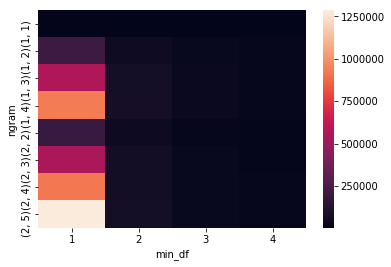

In [261]:
ax = sns.heatmap(nfeatures_s)

The number of features decreases with the increasing min_df and increases with the increasing length of n_grams. While mostly numbers of features are lower with stop_words='english'.

### Scores

#### Without stop_words

In [266]:
g3_1 = GridSearchCV(make_pipeline(CountVectorizer(), Normalizer(), LogisticRegression()), param_grid=param_grid, cv=5, return_train_score=True)

In [267]:
g3_1.fit(X_title_train, y_train)
print("Best parameters: {}".format(g3_1.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g3_1.best_score_))

/Users/hhanchan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (2, 5)], 'countvectorizer__min_df': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [280]:
print("Testing set Accuracy score: {}".format(g3_1.score(X_title_test, y_test)))

Best parameters: {'countvectorizer__min_df': 4, 'countvectorizer__ngram_range': (1, 3)}
Best cross-validation Accuracy score: 0.88
Testing set Accuracy score: 0.8836852861035422


In [270]:
scores = [ ('ngram', g3_1.cv_results_['param_countvectorizer__ngram_range']),
          ('min_df', g3_1.cv_results_['param_countvectorizer__min_df']),
          ('scores', g3_1.cv_results_['mean_test_score'])]
scores = pd.DataFrame.from_items(scores)
scores = scores.pivot_table( index='ngram', columns='min_df', values='scores' )
scores

min_df,1,2,3,4
ngram,,,,
"(1, 1)",0.879130,0.879244,0.879073,0.879130
"(1, 2)",0.879868,0.880550,0.881004,0.881061
"(1, 3)",0.878733,0.880095,0.880890,0.881401
"(1, 4)",0.877314,0.879812,0.880606,0.880947
"(2, 2)",0.865732,0.867435,0.868968,0.869990
"(2, 3)",0.861758,0.864653,0.866356,0.868003
"(2, 4)",0.859884,0.864085,0.865561,0.867719
"(2, 5)",0.858976,0.863915,0.865561,0.867492


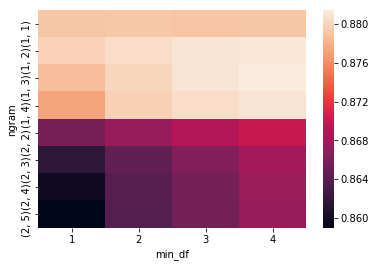

In [271]:
ax = sns.heatmap(scores)

#### stop_words='english'

In [272]:
g3_2 = GridSearchCV(make_pipeline(CountVectorizer(stop_words='english'), Normalizer(), LogisticRegression()), param_grid=param_grid, cv=5, return_train_score=True)

In [273]:
g3_2.fit(X_title_train, y_train)
print("Best parameters: {}".format(g3_2.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g3_2.best_score_))

/Users/hhanchan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'countvectorizer__min_df': 3, 'countvectorizer__ngram_range': (1, 1)}
Best cross-validation Accuracy score: 0.89


In [281]:
print("Testing set Accuracy score: {}".format(g3_2.score(X_title_test, y_test)))

Testing set Accuracy score: 0.8874318801089919


In [275]:
scores_s = [ ('ngram', g3_2.cv_results_['param_countvectorizer__ngram_range']),
          ('min_df', g3_2.cv_results_['param_countvectorizer__min_df']),
          ('scores', g3_2.cv_results_['mean_test_score'])]
scores_s = pd.DataFrame.from_items(scores_s)
scores_s = scores_s.pivot_table( index='ngram', columns='min_df', values='scores' )
scores_s

min_df,1,2,3,4
ngram,,,,
"(1, 1)",0.886511,0.886681,0.886738,0.886511
"(1, 2)",0.884410,0.885205,0.885829,0.886397
"(1, 3)",0.882196,0.884240,0.885262,0.886113
"(1, 4)",0.880379,0.884297,0.885262,0.886227
"(2, 2)",0.840865,0.844839,0.846259,0.848075
"(2, 3)",0.837289,0.843136,0.845748,0.847792
"(2, 4)",0.836096,0.843023,0.845861,0.847792
"(2, 5)",0.835358,0.843023,0.845861,0.847792


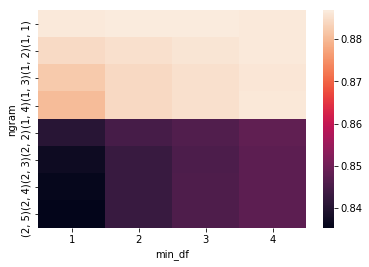

In [277]:
ax = sns.heatmap(scores_s)

## Final Model

The selection of ngram_range=(1, 2) produces the best performance

In [23]:
vect = CountVectorizer(ngram_range=(1, 2))
X_train = vect.fit_transform(X_title_train)
X_test = vect.transform(X_title_test)
feature_names = vect.get_feature_names()

In [24]:
nom = Normalizer()
X_train = nom.fit_transform(X_train)
X_test = nom.transform(X_test)

In [284]:
param_grid = {'C' : np.logspace(-3,3,100)}
g3_3 = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, return_train_score=True, iid=True)
g3_3.fit(X_train, y_train)
print("Best parameters: {}".format(g3_3.best_params_))
print("Best cross-validation Accuracy score: {:.2f}".format(g3_3.best_score_))

Best parameters: {'C': 23.10129700083158}
Best cross-validation Accuracy score: 0.90


In [25]:
lgr = LogisticRegression(C=23.10).fit(X_train, y_train)

### Visualizing Important Features

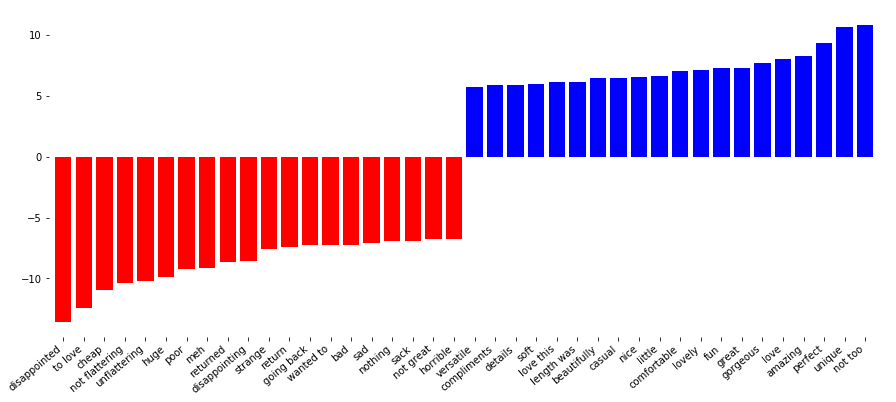

In [286]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

### Final Test Set Scores

In [28]:
print("Final testing set Accuracy score: {}".format(lgr.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr.decision_function(X_test))))

Final testing set Accuracy score: 0.8801089918256131
Final testing set AUC score: 0.8916767444690883


# Task 4 Model Tuning

## penalty = 'l1'

In [14]:
lgr_l1 = LogisticRegression(C=23.10, penalty='l1').fit(X_train, y_train)

In [15]:
print("Final testing set Accuracy score: {}".format(lgr_l1.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr_l1.decision_function(X_test))))

Final testing set Accuracy score: 0.872275204359673
Final testing set AUC score: 0.8671313475016216


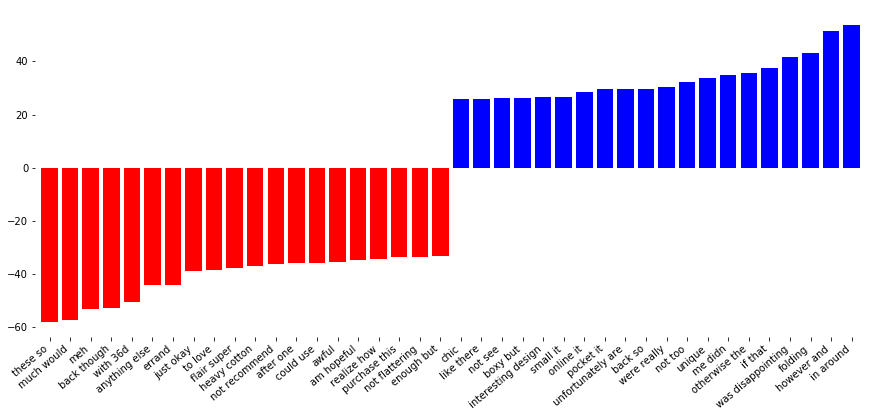

In [289]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr_l1.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

## penalty = 'l2'

In [10]:
lgr_l2 = LogisticRegression(C=23.10, penalty='l2').fit(X_train, y_train)

In [11]:
print("Final testing set Accuracy score: {}".format(lgr_l2.score(X_test, y_test)))
print("Final testing set AUC score: {}".format(roc_auc_score(y_test, lgr_l2.decision_function(X_test))))

Final testing set Accuracy score: 0.8801089918256131
Final testing set AUC score: 0.8916767444690883


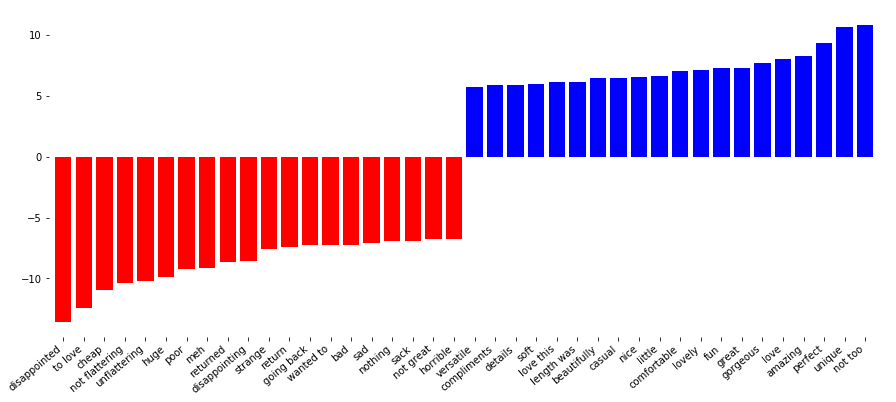

In [293]:
plt.figure(figsize=(15, 6))
plot_important_features(lgr_l2.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("coefficients.png")

Options for example: Since the best performing features are with Logistic Regression under the default penalty "l2", we shall try using different n_grams, min_df, max_df or stop_words with l1 penalty.